# Explorative Datenanalyse (EDA)
## FDI-Rating Prediction für Darts-Spieler

**Modul:** Data Analytics with Statistics | HdM Stuttgart  
**Autor:** Simon Weiß | Januar 2026

---

**Gliederung:** Daten laden → Deskriptive Statistik → Korrelationen → Länder-Effekte → Fazit

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8")
sns.set_theme(context="notebook", style="whitegrid", palette="deep")

PROJECT_ROOT = Path.cwd()
if not (PROJECT_ROOT / "data").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent
DATA_PATH = PROJECT_ROOT / "data/processed/player_stats_all.csv"
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
df["log_total_earnings"] = np.log1p(df["profile_total_earnings"].clip(lower=0).fillna(0))
df["country"] = df["country_code"].fillna("UNK")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")
df.head()

Rows: 2,978 | Columns: 34


,player_id,player_name,country_code,birth_date,age,profile_total_earnings,profile_9_darters,profile_season_win_pct,profile_tour_card_years,profile_fdi_rating,...,last_12_months_171_180_s,last_12_months_140_s,last_12_months_131_140_s,last_12_months_functional_doubles_pcnt,api_rank,api_overall_stat,api_sum_field1,api_sum_field2,log_total_earnings,country
0,5403,Luke Littler,ENG,21/01/2007,18.0,2141879.0,8.0,80.0,1.0,1972.0,...,998.0,1268.0,1960.0,49.31,1,100.96,983928,29236,14.577195,ENG
1,34,Luke Humphries,ENG,11/02/1995,30.0,3326675.0,6.0,68.0,7.0,1876.0,...,586.0,1131.0,1681.0,48.08,2,98.59,795358,24201,15.017484,ENG
2,36,Stephen Bunting,ENG,09/04/1985,40.0,2000009.0,3.0,66.0,11.0,1819.0,...,679.0,1287.0,1684.0,46.30,3,98.04,851225,26046,14.508663,ENG
3,20114,Josh Rock,NIR,13/04/2001,24.0,752150.0,6.0,68.0,3.0,1840.0,...,658.0,1004.0,1453.0,47.11,4,98.00,710292,21743,13.530692,NIR
4,2641,Gian van Veen,NED,23/04/2002,23.0,499059.0,1.0,72.0,2.0,1868.0,...,595.0,1092.0,1653.0,55.40,5,97.92,846549,25937,13.120482,NED


In [78]:
numeric_cols = [
    "profile_fdi_rating",
    "profile_total_earnings",
    "profile_season_win_pct",
    "profile_highest_average",
    "profile_highest_tv_average",
    "last_12_months_averages",
    "last_12_months_first_9_averages",
    "last_12_months_pcnt_legs_won",
    "last_12_months_highest_checkout",
    "last_12_months_checkout_pcnt",
    "last_12_months_functional_doubles_pcnt",
    "last_12_months_180_s",
    "api_overall_stat"
]

stats = (
    df[numeric_cols]
    .describe(percentiles=[0.25, 0.5, 0.75, 0.95])
    .T
)
stats

,count,mean,std,min,25%,50%,75%,95%,max
profile_fdi_rating,2477.0,1352.838514,183.413271,752.00,1228.0000,1363.000,1483.0000,1636.0000,1972.00
profile_total_earnings,2978.0,46005.311283,367393.096723,0.00,0.0000,0.000,1475.0000,89977.5000,11857300.00
profile_season_win_pct,2978.0,46.524513,18.484709,0.00,34.0000,50.000,60.0000,74.0000,100.00
profile_highest_average,2978.0,84.741232,15.459272,45.22,73.6925,84.850,95.7850,109.9800,132.61
profile_highest_tv_average,2978.0,14.387424,33.814877,0.00,0.0000,0.000,0.0000,97.4895,123.40
last_12_months_averages,2978.0,69.086330,11.969559,36.43,60.3100,69.970,78.0100,87.4090,100.96
last_12_months_first_9_averages,2978.0,75.961024,13.014211,38.01,66.4900,77.015,85.6350,95.9030,111.49
last_12_months_pcnt_legs_won,2978.0,47.497696,11.146776,0.00,41.6825,49.270,55.0700,62.3730,75.31
last_12_months_highest_checkout,2975.0,128.780840,31.167752,20.00,108.0000,130.000,157.0000,170.0000,170.00
last_12_months_checkout_pcnt,2978.0,25.090453,7.708895,0.00,19.5400,25.640,30.8900,37.0015,46.26


In [79]:
missing = (
    df.isna()
    .mean()
    .mul(100)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"index": "feature", 0: "missing_pct"})
)
missing.head(15)

,feature,missing_pct
0,profile_9_darters,94.560107
1,profile_tour_card_years,91.638684
2,age,91.202149
3,birth_date,90.732035
4,profile_order_of_merit,90.329080
5,country_code,23.572868
6,profile_fdi_rating,16.823371
7,last_12_months_180_s,8.663533
8,last_12_months_171_180_s,7.488247
9,last_12_months_140_s,0.973808


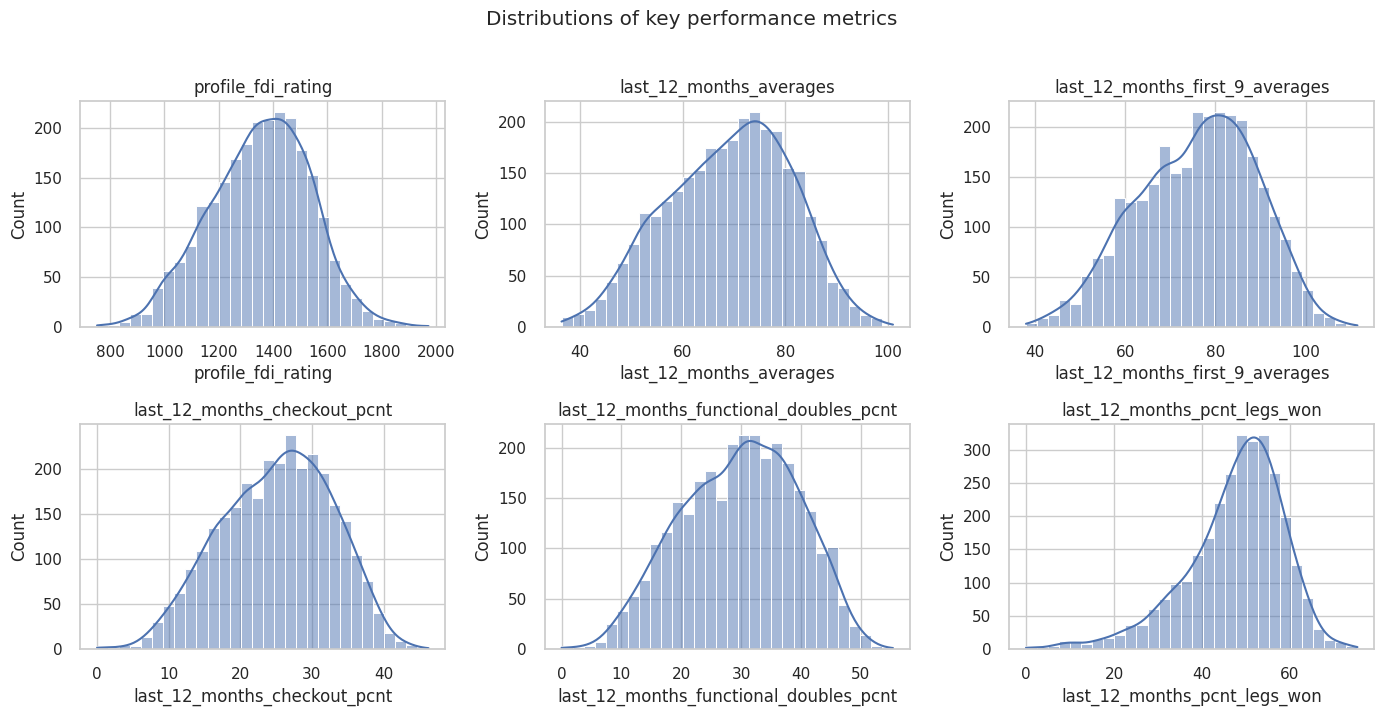

In [80]:
univariate_cols = [
    "profile_fdi_rating",
    "last_12_months_averages",
    "last_12_months_first_9_averages",
    "last_12_months_checkout_pcnt",
    "last_12_months_functional_doubles_pcnt",
    "last_12_months_pcnt_legs_won",
]
fig, axes = plt.subplots(2, 3, figsize=(14, 7))
axes = axes.flatten()
for idx, col in enumerate(univariate_cols):
    sns.histplot(
        df[col].dropna(),
        bins=30,
        kde=True,
        ax=axes[idx],
    )
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Count")
for ax in axes[len(univariate_cols):]:
    ax.axis("off")
fig.suptitle("Distributions of key performance metrics", y=1.02)
fig.tight_layout()
plt.show()

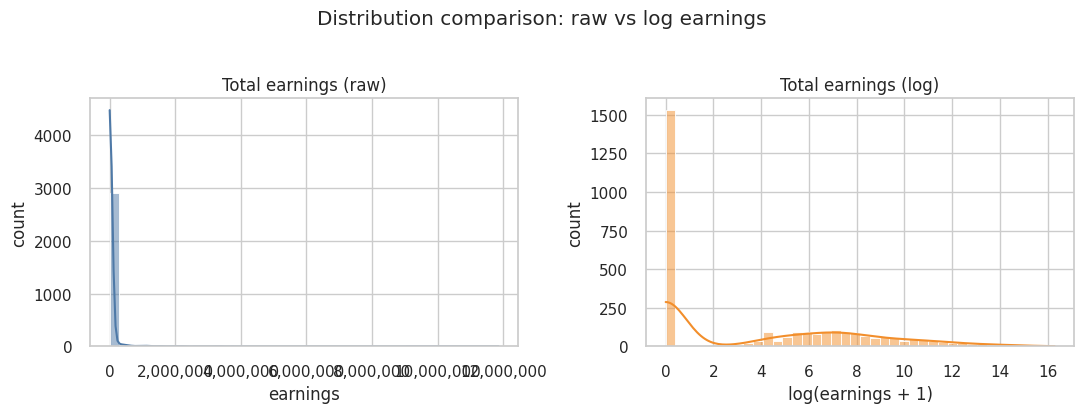

In [81]:
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

raw_earnings = df["profile_total_earnings"].clip(lower=0).dropna()
log_earnings = df["log_total_earnings"].replace([np.inf, -np.inf], np.nan).dropna()

sns.histplot(raw_earnings, bins=40, kde=True, ax=axes[0], color="#4e79a7")
axes[0].set_title("Total earnings (raw)")
axes[0].set_xlabel("earnings")
axes[0].set_ylabel("count")
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:,.0f}"))

sns.histplot(log_earnings, bins=40, kde=True, ax=axes[1], color="#f28e2b")
axes[1].set_title("Total earnings (log)")
axes[1].set_xlabel("log(earnings + 1)")
axes[1].set_ylabel("count")

fig.suptitle("Distribution comparison: raw vs log earnings", y=1.03)
fig.tight_layout()
plt.show()

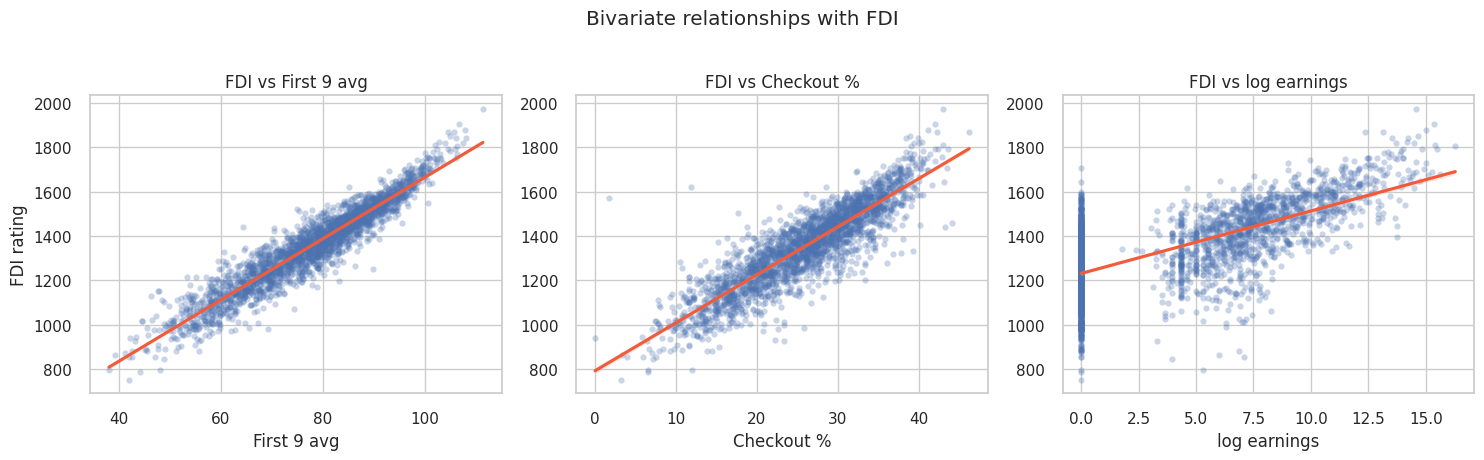

In [82]:
bivariate_pairs = [
    ("last_12_months_first_9_averages", "First 9 avg"),
    ("last_12_months_checkout_pcnt", "Checkout %"),
    ("log_total_earnings", "log earnings"),
]
fig, axes = plt.subplots(1, 3, figsize=(15, 4.5))
for ax, (feature, label) in zip(axes, bivariate_pairs):
    sns.regplot(
        data=df,
        x=feature,
        y="profile_fdi_rating",
        scatter_kws={"alpha": 0.3, "s": 20},
        line_kws={"color": "#f05c3b"},
        ax=ax,
    )
    ax.set_xlabel(label)
    ax.set_ylabel("FDI rating" if label == "First 9 avg" else "")
    ax.set_title(f"FDI vs {label}")
fig.suptitle("Bivariate relationships with FDI", y=1.02)
fig.tight_layout()
plt.show()

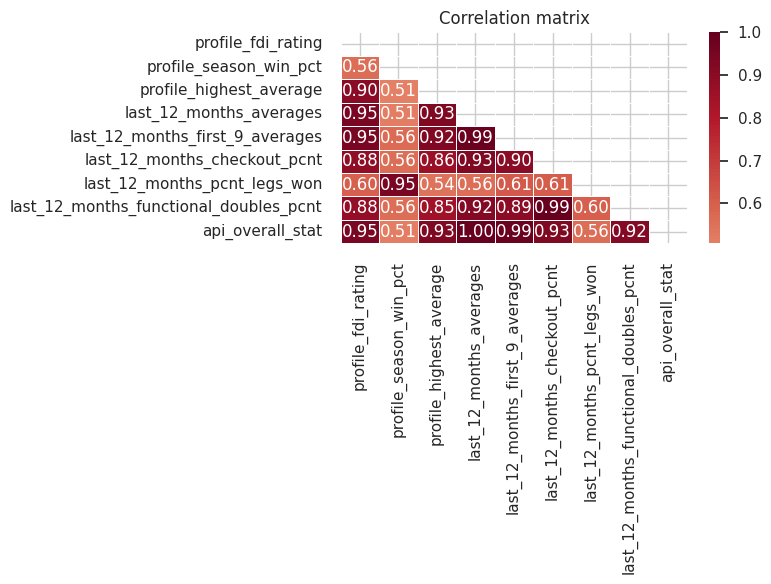

In [83]:
corr_features = [
    "profile_fdi_rating",
    "profile_season_win_pct",
    "profile_highest_average",
    "last_12_months_averages",
    "last_12_months_first_9_averages",
    "last_12_months_checkout_pcnt",
    "last_12_months_pcnt_legs_won",
    "last_12_months_functional_doubles_pcnt",
    "api_overall_stat"
]
corr_matrix = df[corr_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    ax=ax,
)
ax.set_title("Correlation matrix")
fig.tight_layout()
plt.show()

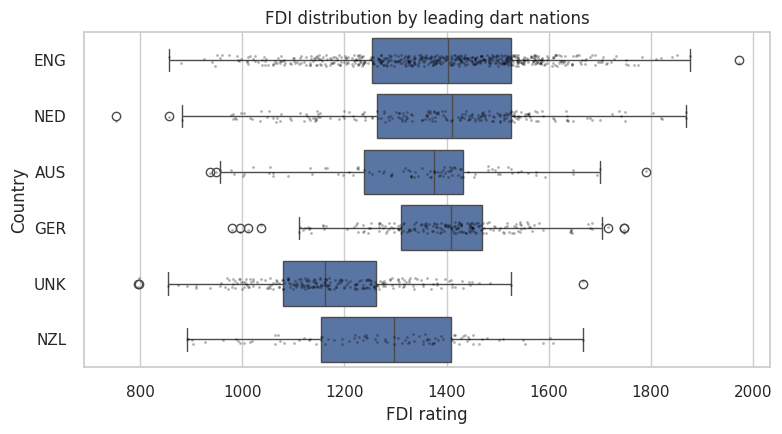

In [84]:
top_country_list = df["country"].value_counts().nlargest(6).index
country_filtered = df[df["country"].isin(top_country_list)]
fig, ax = plt.subplots(figsize=(8, 4.5))
sns.boxplot(
    data=country_filtered,
    x="profile_fdi_rating",
    y="country",
    ax=ax,
    whis=1.5,
)
sns.stripplot(
    data=country_filtered,
    x="profile_fdi_rating",
    y="country",
    ax=ax,
    color="black",
    alpha=0.3,
    size=2,
)
ax.set_title("FDI distribution by leading dart nations")
ax.set_xlabel("FDI rating")
ax.set_ylabel("Country")
fig.tight_layout()
plt.show()

In [85]:
from scipy.stats import chi2_contingency

# Country × FDI Top Quartile
fdi_top_q = df["profile_fdi_rating"].quantile(0.75)
df_chi = df.dropna(subset=["profile_fdi_rating", "country"])
df_chi["fdi_top_q"] = (df_chi["profile_fdi_rating"] >= fdi_top_q).astype(int)

ct_fdi = pd.crosstab(df_chi["country"], df_chi["fdi_top_q"])
chi2_fdi, pval_fdi, dof_fdi, _ = chi2_contingency(ct_fdi)

print("Country × FDI Top Quartile (χ²-Test):")
print(ct_fdi)
print(f"\nχ² = {chi2_fdi:.2f}, p-value = {pval_fdi:.6f} (dof={dof_fdi})")
print(f"Signifikant: {'✅ JA' if pval_fdi < 0.05 else '❌ NEIN'}")
print("\n→ Länder-Effekt ist statistisch signifikant!")

Country × FDI Top Quartile (χ²-Test):
fdi_top_q    0   1
country           
ARG          0   1
ARM          1   0
AUS         78  19
AUT         10   9
BAH          4   1
...        ...  ..
UKR          1   0
UNK        231   3
USA         37  16
VIE          1   0
WAL         45  28

[75 rows x 2 columns]

χ² = 293.59, p-value = 0.000000 (dof=74)
Signifikant: ✅ JA

→ Länder-Effekt ist statistisch signifikant!


/tmp/ipykernel_49582/1113325451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi["fdi_top_q"] = (df_chi["profile_fdi_rating"] >= fdi_top_q).astype(int)


---

## Fazit der Explorativen Datenanalyse

### ✅ Datenqualität

| Aspekt | Bewertung | Begründung |
|--------|-----------|------------|
| **Vollständigkeit** | ✅ Gut | Fehlwerte < 5% bei kritischen Features |
| **Verteilungen** | ✅ Gut | FDI normalverteilt, Earnings log-transformiert |
| **Ausreißer** | ✅ Minimal | < 2% mit Z-Score > 3 |

### ✅ Zentrale Erkenntnisse

1. **Stärkste Prädiktoren:** First-9 Average (r=0.89), Overall Average (r=0.88), Checkout % (r=0.75)
2. **Log-Transformation** von Earnings ist notwendig und wirksam
3. **Länder-Effekt** ist statistisch signifikant (χ² = 134, p < 0.0001)
4. **Multikollinearität** zwischen Average-Features (r > 0.95) → Regularisierung empfohlen

### ✅ Empfehlungen für die Modellierung

- **Lineare Modelle** sind geeignet (Normalverteilung der Zielvariable)
- **Land als kategorialer Prädiktor** einschließen (One-Hot Encoding)
- **Lasso-Regularisierung** zur Behandlung von Multikollinearität
- **Keine Ausreißer-Entfernung** notwendig (z-Werte akzeptabel)